In [1]:
import torch

x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad= True)

y_ = w*x

loss = (y_ - y)**2

loss.backward()
print(w.grad)

tensor(-2.)


In [5]:
# linear regression implmenetation using numpy
import numpy as np

X = np.array([1,2,3,4], dtype = np.float32)
Y = np.array([4,6,8,10], dtype = np.float32)

w = 0.0
b = 0.0

def forward(x):
    return w * x + b

def loss(y, y_pred):
    return ((y_pred-y)**2).mean()

# gradient
# MSE, J  = 1/N * (w*x + b - y)**2
# dJ/dw = 1/N * 2 *(w*x + b - y)*x
# dJ/dw = 1/N * 2 *(w*x + b - y)

def gradient(x, y, y_pred):
    return np.dot(2*x, y_pred - y).mean()

print(f'Prediction before training: f(5)= {forward(5):.3f}')

learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
    # Predriction = forward pass
    y_pred = forward(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # Gradients
    dw = gradient(X, Y, y_pred)
    db = gradient(1, Y, y_pred)
    
    w -= learning_rate * dw
    b -= learning_rate * db
    
    if epoch % 1 == 0:
        print(f'epoch {epoch+1}:w = {w:.3f}, b = {b:.3f}, loss = {l:.8f}')
        
print(f'Prediction after training: f(5)= {forward(5):.3f}')

Prediction before training: f(5)= 0.000
epoch 1:w = 1.600, b = 0.140, loss = 54.00000000
epoch 2:w = 2.212, b = 0.197, loss = 8.37959957
epoch 3:w = 2.445, b = 0.223, loss = 1.67620087
epoch 4:w = 2.534, b = 0.236, loss = 0.68875295
epoch 5:w = 2.566, b = 0.245, loss = 0.54085684
epoch 6:w = 2.578, b = 0.251, loss = 0.51628745
epoch 7:w = 2.581, b = 0.257, loss = 0.50985038
epoch 8:w = 2.581, b = 0.263, loss = 0.50609434
epoch 9:w = 2.580, b = 0.269, loss = 0.50275046
epoch 10:w = 2.578, b = 0.275, loss = 0.49948555
epoch 11:w = 2.576, b = 0.280, loss = 0.49624988
epoch 12:w = 2.574, b = 0.286, loss = 0.49303660
epoch 13:w = 2.573, b = 0.291, loss = 0.48984402
epoch 14:w = 2.571, b = 0.297, loss = 0.48667246
epoch 15:w = 2.569, b = 0.302, loss = 0.48352101
epoch 16:w = 2.567, b = 0.308, loss = 0.48039040
epoch 17:w = 2.565, b = 0.313, loss = 0.47727972
epoch 18:w = 2.563, b = 0.319, loss = 0.47418940
epoch 19:w = 2.562, b = 0.324, loss = 0.47111896
epoch 20:w = 2.560, b = 0.330, loss =

In [6]:
# linear regression implmenetation using torch
import numpy as np

X = torch.tensor([1,2,3,4], dtype = torch.float32)
Y = torch.tensor([4,6,8,10], dtype = torch.float32)

w = torch.tensor(0.0, dtype= torch.float32, requires_grad= True)
b = torch.tensor(0.0, dtype= torch.float32, requires_grad= True)

def forward(x):
    return w * x + b

def loss(y, y_pred):
    return ((y_pred-y)**2).mean()

# gradient
# MSE, J  = 1/N * (w*x + b - y)**2
# dJ/dw = 1/N * 2 *(w*x +b - y)*x
# dJ/db = 1/N * 2 *(w*x + b -y)

def gradient(x, y, y_pred):
    return np.dot(2*x, y_pred - y).mean()

print(f'Prediction before training: f(5)= {forward(5):.3f}')

learning_rate = 0.01
n_iters = 300

for epoch in range(n_iters):
    # Predriction = forward pass
    y_pred = forward(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # Gradients
    l.backward()
    
    # since we do not want the below function to be a part of the computational graph 
    # for gradient calculation
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad
    
    # zero gradients
    w.grad.zero_()
    
    if epoch % 10 == 0:
        print(f'epoch {epoch+1}:w = {w:.3f}, b = {b:.3f}, loss = {l:.8f}')
        
print(f'Prediction after training: f(5)= {forward(13):.3f}')

Prediction before training: f(5)= 0.000
epoch 1:w = 0.400, b = 0.140, loss = 54.00000000
epoch 11:w = 1.503, b = 4.860, loss = 1.78267241
epoch 21:w = 0.609, b = 7.566, loss = 7.11165619
epoch 31:w = 0.358, b = 6.436, loss = 3.67926884
epoch 41:w = 0.806, b = 4.466, loss = 2.19601917
epoch 51:w = 1.298, b = 3.367, loss = 0.86372375
epoch 61:w = 1.559, b = 3.020, loss = 0.27237505
epoch 71:w = 1.663, b = 2.872, loss = 0.14877838
epoch 81:w = 1.728, b = 2.687, loss = 0.09712599
epoch 91:w = 1.794, b = 2.489, loss = 0.05715268
epoch 101:w = 1.853, b = 2.339, loss = 0.02977762
epoch 111:w = 1.896, b = 2.243, loss = 0.01470091
epoch 121:w = 1.925, b = 2.181, loss = 0.00760492
epoch 131:w = 1.944, b = 2.135, loss = 0.00415424
epoch 141:w = 1.959, b = 2.099, loss = 0.00228116
epoch 151:w = 1.970, b = 2.072, loss = 0.00122589
epoch 161:w = 1.978, b = 2.052, loss = 0.00064818
epoch 171:w = 1.984, b = 2.038, loss = 0.00034316
epoch 181:w = 1.988, b = 2.028, loss = 0.00018333
epoch 191:w = 1.991,

In [43]:
# linear regression implmenetation using torch
import numpy as np

X = torch.tensor([1,2,3,4], dtype = torch.float32)
Y = torch.tensor([4,6,8,10], dtype = torch.float32)

w = torch.tensor(0.0, dtype= torch.float32, requires_grad= True)
b = torch.tensor(0.0, dtype= torch.float32, requires_grad= True)

def forward(x):
    return w * x + b

def loss(y, y_pred):
    return ((y_pred-y)**2).mean()

# gradient
# MSE, J  = 1/N * (w*x - y)**2
# dJ/dw = 1/N * 2 *(w*x - y)*x

# def gradient(x, y, y_pred):
#     return np.dot(2*x, y_pred - y).mean()

print(f'Prediction before training: f(5)= {forward(5):.3f}')

learning_rate = 0.01
n_iters = 300

for epoch in range(n_iters):
    # Predriction = forward pass
    y_pred = forward(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # Gradients
    l.backward()
    
    # since we do not want the below function to be a part of the computational graph 
    # for gradient calculation
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad
    
    # zero gradients
    w.grad.zero_()
    
    if epoch % 10 == 0:
        print(f'epoch {epoch+1}:w = {w:.3f}, b = {b:.3f}, loss = {l:.8f}')
        
print(f'Prediction after training: f(5)= {forward(13):.3f}')

Prediction after training: f(5)= 41.995


In [56]:
# implementation of linear regression using torch SGD optimizer

import torch
import torch.nn as nn

X = torch.tensor([1,2,3,4], dtype = torch.float32)
Y = torch.tensor([4,6,8,10], dtype = torch.float32)

w = torch.tensor(0.0, dtype= torch.float32, requires_grad= True)
b = torch.tensor(0.0, dtype= torch.float32, requires_grad= True)

def forward(x):
    return w * x + b

# gradient
# MSE, J  = 1/N * (w*x - y)**2
# dJ/dw = 1/N * 2 *(w*x - y)*x

# def gradient(x, y, y_pred):
#     return np.dot(2*x, y_pred - y).mean()

print(f'Prediction before training: f(5)= {forward(5):.3f}')

learning_rate = 0.01
n_iters = 1000


# def loss(y, y_pred):
#     return ((y_pred-y)**2).mean()

loss = nn.MSELoss()
optimizer = torch.optim.SGD([w,b], lr=learning_rate) 

for epoch in range(n_iters):
    # Predriction = forward pass
    y_pred = forward(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # Gradients
    l.backward()
    
    # since we do not want the below function to be a part of the computational graph 
    # for gradient calculation
    optimizer.step()
    # zero gradients
    optimizer.zero_grad()
    
    if epoch % 50 == 0:
        print(f'epoch {epoch+1}:w = {w:.3f}, b = {b:.3f}, loss = {l:.8f}')
        
print(f'Prediction after training: f(5)= {forward(13):.3f}')

Prediction before training: f(5)= 0.000
epoch 1:w = 0.400, b = 0.140, loss = 54.00000000
epoch 51:w = 2.345, b = 0.985, loss = 0.17315590
epoch 101:w = 2.297, b = 1.126, loss = 0.12829719
epoch 151:w = 2.256, b = 1.248, loss = 0.09506008
epoch 201:w = 2.220, b = 1.353, loss = 0.07043342
epoch 251:w = 2.190, b = 1.443, loss = 0.05218674
epoch 301:w = 2.163, b = 1.520, loss = 0.03866710
epoch 351:w = 2.140, b = 1.587, loss = 0.02864994
epoch 401:w = 2.121, b = 1.645, loss = 0.02122775
epoch 451:w = 2.104, b = 1.694, loss = 0.01572841
epoch 501:w = 2.090, b = 1.737, loss = 0.01165373
epoch 551:w = 2.077, b = 1.773, loss = 0.00863470
epoch 601:w = 2.066, b = 1.805, loss = 0.00639778
epoch 651:w = 2.057, b = 1.832, loss = 0.00474035
epoch 701:w = 2.049, b = 1.855, loss = 0.00351228
epoch 751:w = 2.042, b = 1.876, loss = 0.00260239
epoch 801:w = 2.036, b = 1.893, loss = 0.00192822
epoch 851:w = 2.031, b = 1.908, loss = 0.00142867
epoch 901:w = 2.027, b = 1.921, loss = 0.00105858
epoch 951:w 

In [67]:
# implementation of linear regression using torch SGD optimizer and pytorch model

import torch
import torch.nn as nn

X = torch.tensor([[1],[2],[3],[4]], dtype = torch.float32)
Y = torch.tensor([[4],[6],[8],[10]], dtype = torch.float32)

X_test = torch.tensor([13], dtype=torch.float32)

n_samples, n_features = X.shape
print(n_samples, n_features)
input_size = n_features
output_size = n_features

model = nn.Linear(input_size, output_size)
# def forward(x):
#     return w * x + b

# gradient
# MSE, J  = 1/N * (w*x - y)**2
# dJ/dw = 1/N * 2 *(w*x - y)*x

# def gradient(x, y, y_pred):
#     return np.dot(2*x, y_pred - y).mean()

print(f'Prediction before training: f(5)= {model.forward(X_test).item():.3f}')

learning_rate = 0.01
n_iters = 1000


# def loss(y, y_pred):
#     return ((y_pred-y)**2).mean()

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 

for epoch in range(n_iters):
    # Predriction = forward pass
    y_pred = model(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # Gradients
    l.backward()
    
    # since we do not want the below function to be a part of the computational graph 
    # for gradient calculation
    optimizer.step()
    # zero gradients
    optimizer.zero_grad()
    
    if epoch % 50 == 0:
        [w,b] = model.parameters()
        print(f'epoch {epoch+1}:w = {w[0][0]:.3f}, b = {b[0]:.3f}, loss = {l:.8f}')
        
print(f'Prediction after training: f(5)= {model.forward(X_test).item():.3f}')

4 1
Prediction before training: f(5)= -8.212
epoch 1:w = -0.087, b = -0.258, loss = 88.21510315
epoch 51:w = 2.406, b = 0.806, loss = 0.23968147
epoch 101:w = 2.350, b = 0.972, loss = 0.17758822
epoch 151:w = 2.301, b = 1.115, loss = 0.13158160
epoch 201:w = 2.259, b = 1.238, loss = 0.09749377
epoch 251:w = 2.223, b = 1.344, loss = 0.07223672
epoch 301:w = 2.192, b = 1.436, loss = 0.05352296
epoch 351:w = 2.165, b = 1.514, loss = 0.03965700
epoch 401:w = 2.142, b = 1.582, loss = 0.02938343
epoch 451:w = 2.122, b = 1.640, loss = 0.02177122
epoch 501:w = 2.105, b = 1.690, loss = 0.01613114
epoch 551:w = 2.091, b = 1.733, loss = 0.01195215
epoch 601:w = 2.078, b = 1.770, loss = 0.00885577
epoch 651:w = 2.067, b = 1.802, loss = 0.00656160
epoch 701:w = 2.058, b = 1.830, loss = 0.00486172
epoch 751:w = 2.050, b = 1.854, loss = 0.00360227
epoch 801:w = 2.043, b = 1.874, loss = 0.00266906
epoch 851:w = 2.037, b = 1.892, loss = 0.00197759
epoch 901:w = 2.032, b = 1.907, loss = 0.00146528
epoch

epoch: 1, loss = 5765.6523
epoch: 11, loss = 4269.3823
epoch: 21, loss = 3187.9233
epoch: 31, loss = 2405.3833
epoch: 41, loss = 1838.5376
epoch: 51, loss = 1427.5292
epoch: 61, loss = 1129.2446
epoch: 71, loss = 912.5865
epoch: 81, loss = 755.0953
epoch: 91, loss = 640.5316


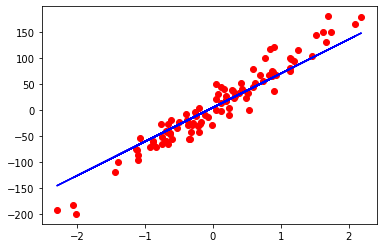

In [81]:
# final linear regerssio using all the torch helper functions
import torch
import torch.nn as nn
import numpy as np

from sklearn import datasets
import matplotlib.pyplot as plt

X_numpy, Y_numpy = datasets.make_regression(n_samples= 100, n_features=1, noise=20, random_state=1)

# print(Y_numpy)

X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(Y_numpy.astype(np.float32))

# below makes [1,2,3] to [[1],[2],[3]]
Y = Y.view(Y.shape[0], 1)
# print(Y)

n_samples, n_features = X.shape

input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# Training Loops
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass
    Y_pred = model(X)
    # loss 
    loss = criterion(Y_pred, Y)
    # backward pass
    loss.backward()
    # update
    optimizer.step()
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')
        
# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, Y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()